In [1]:
# User_ID	User ID
# Product_ID	Product ID
# Gender	Sex of User
# Age	Age in bins
# Occupation	Occupation (Masked)
# City_Category	Category of the City (A,B,C)
# Stay_In_Current_City_Years	Number of years stay in current city
# Marital_Status	Marital Status
# Product_Category_1	Product Category (Masked)
# Product_Category_2	Product may belongs to other category also (Masked)
# Product_Category_3	Product may belongs to other category also (Masked)
# Purchase	Purchase Amount (Target Variable)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv(r"C:\Users\yamun\Downloads\Black-Friday-Sales-Prediction-master\Black-Friday-Sales-Prediction-master\Data\BlackFridaySales.csv")

In [4]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
data.shape

(550068, 12)

In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [7]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [8]:
data.isnull().sum()/data.shape[0]*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

In [10]:
data.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

C:\Users\yamun\AppData\Local\Temp\ipykernel_4188\2016751557.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Purchase"],color='r')


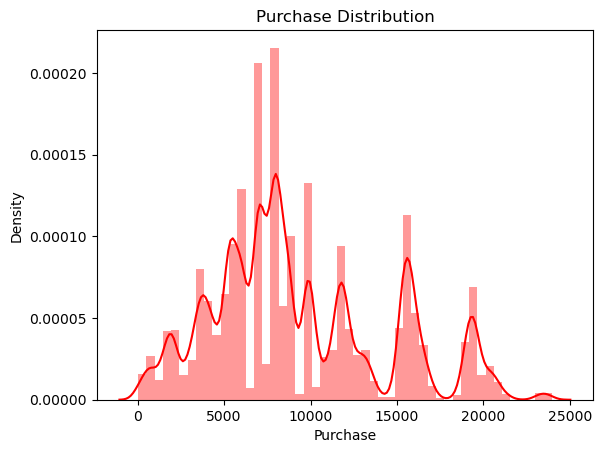

In [10]:
sns.distplot(data["Purchase"],color='r')
plt.title("Purchase Distribution")
plt.show()

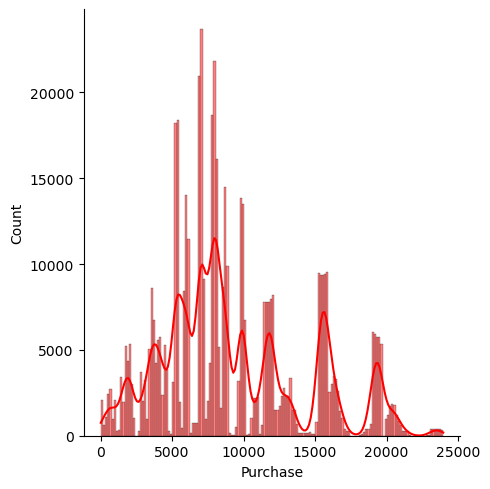

In [9]:
sns.displot(data["Purchase"], kde=True, color='r')
plt.show()


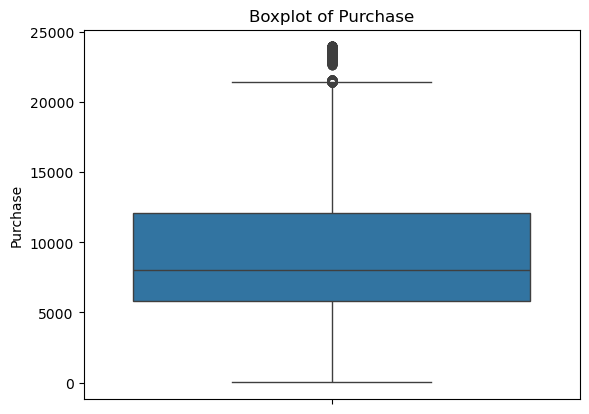

In [10]:
sns.boxplot(data["Purchase"])
plt.title("Boxplot of Purchase")
plt.show()

In [11]:
data["Purchase"].skew()

0.6001400037087128

In [12]:
data["Purchase"].kurtosis()

-0.3383775655851702

In [13]:
data["Purchase"].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

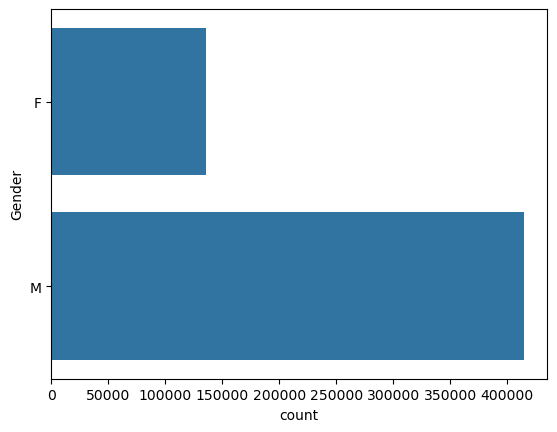

In [14]:
sns.countplot(data['Gender'])
plt.show()

In [15]:
data['Gender'].value_counts(normalize=True)*100

Gender
M    75.310507
F    24.689493
Name: proportion, dtype: float64

In [16]:
data.groupby("Gender")["Purchase"].mean()


Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

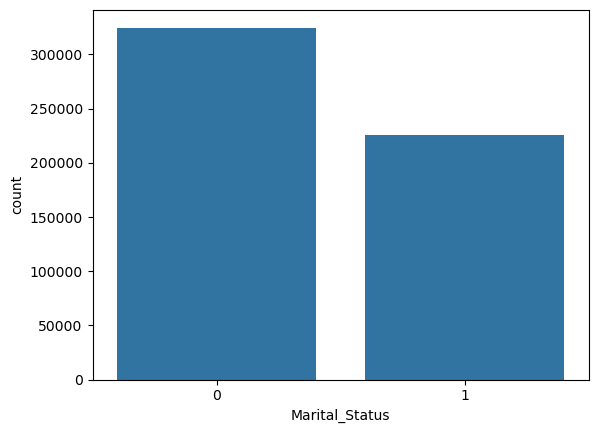

In [17]:
sns.countplot(x='Marital_Status', data=data)
plt.show()


In [18]:
data.groupby("Marital_Status")["Purchase"].mean()

Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64

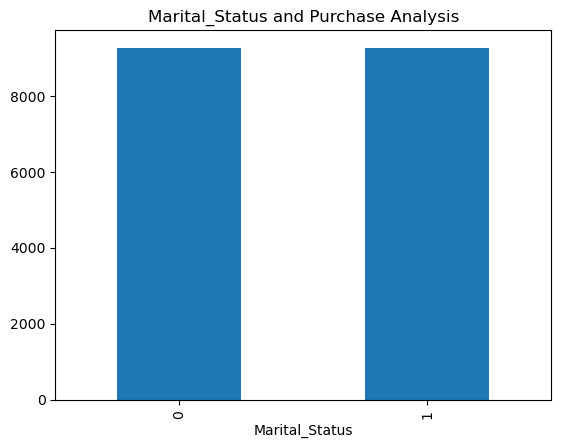

In [19]:
data.groupby("Marital_Status")["Purchase"].mean().plot(kind='bar')
plt.title("Marital_Status and Purchase Analysis")
plt.show()

<Axes: ylabel='count'>

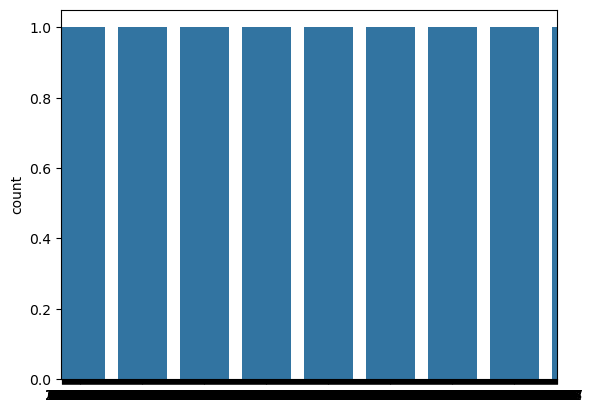

In [20]:
sns.countplot(data['Occupation'].sample(1000))  # if the dataset is large


In [21]:
occup = pd.DataFrame(data.groupby("Occupation")["Purchase"].mean())
occup

,Purchase
Occupation,
0,9124.428588
1,8953.193270
2,8952.481683
3,9178.593088
4,9213.980251
5,9333.149298
6,9256.535691
7,9425.728223
8,9532.592497


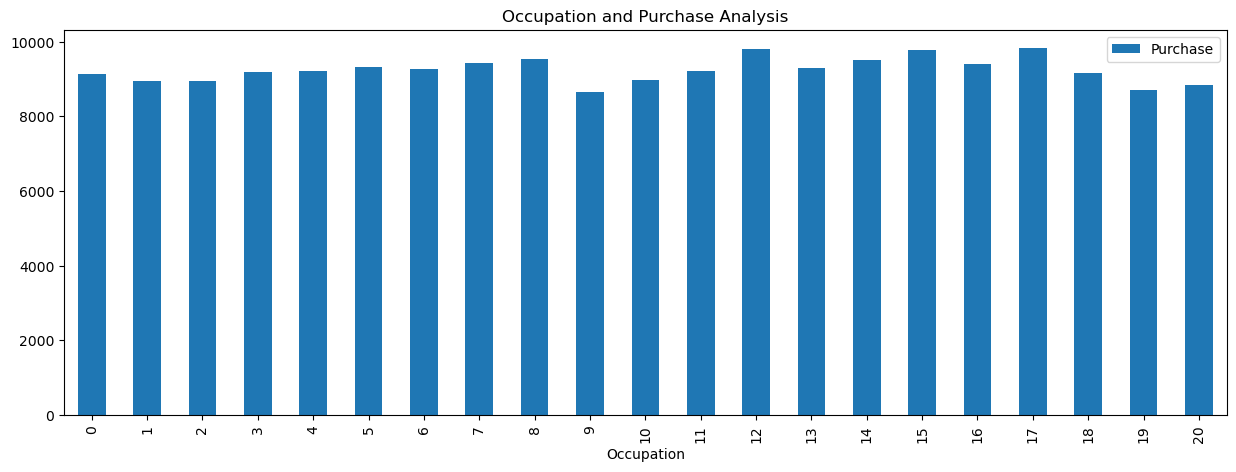

In [22]:
occup.plot(kind='bar',figsize=(15,5))
plt.title("Occupation and Purchase Analysis")
plt.show()

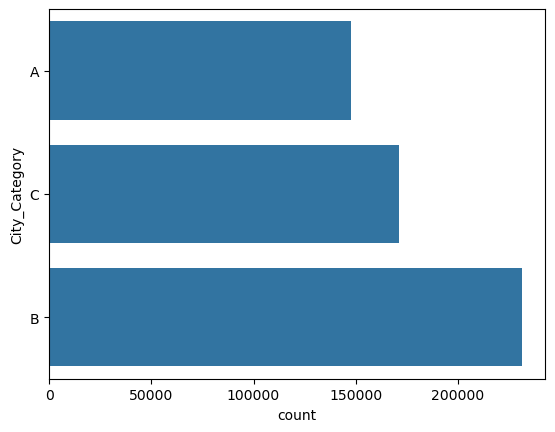

In [23]:
sns.countplot(data['City_Category'])
plt.show()

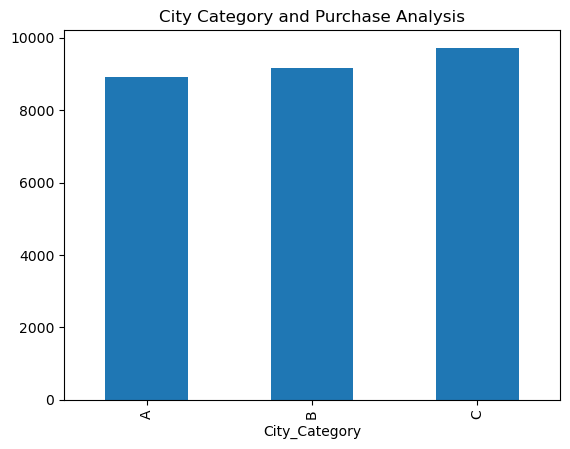

In [24]:
data.groupby("City_Category")["Purchase"].mean().plot(kind='bar')
plt.title("City Category and Purchase Analysis")
plt.show()

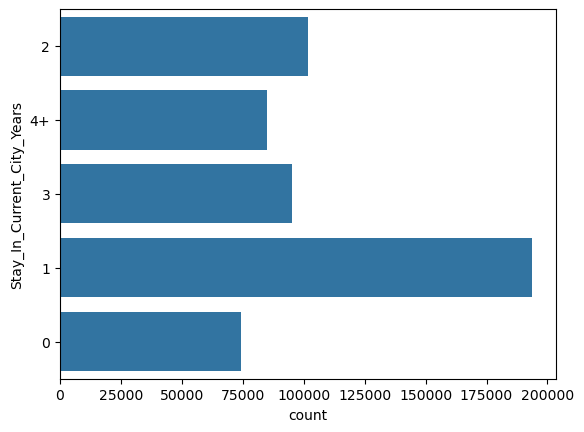

In [25]:
sns.countplot(data['Stay_In_Current_City_Years'])
plt.show()

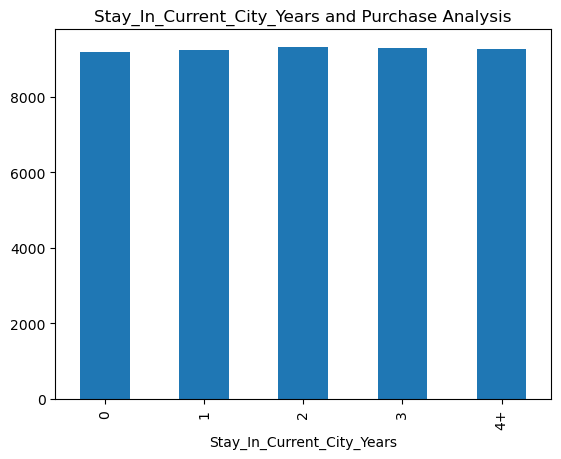

In [26]:
data.groupby("Stay_In_Current_City_Years")["Purchase"].mean().plot(kind='bar')
plt.title("Stay_In_Current_City_Years and Purchase Analysis")
plt.show()

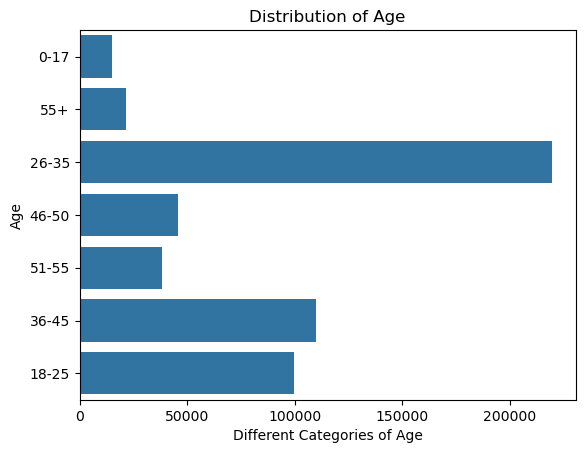

In [27]:
sns.countplot(data['Age'])
plt.title('Distribution of Age')
plt.xlabel('Different Categories of Age')
plt.show()

<Axes: xlabel='Age'>

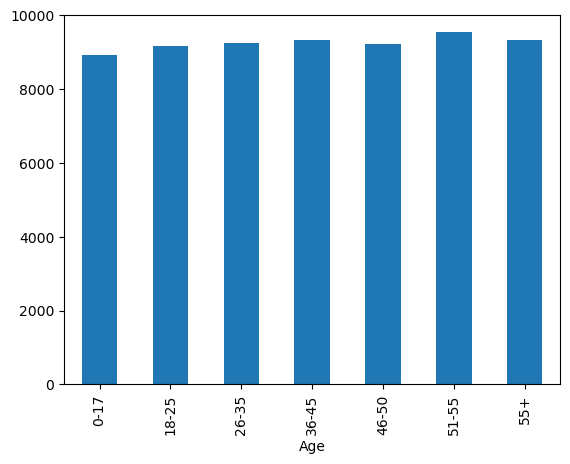

In [28]:
data.groupby("Age")["Purchase"].mean().plot(kind='bar')

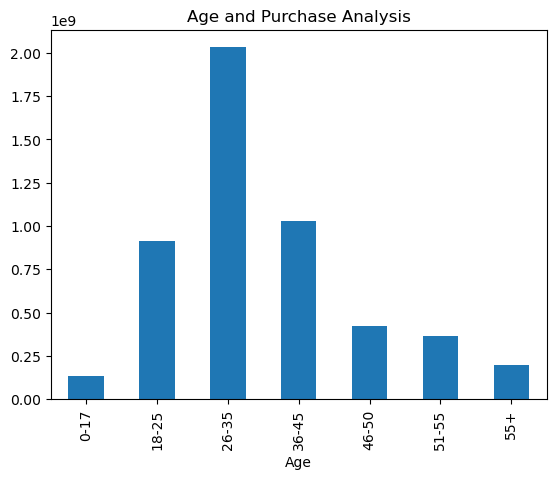

In [29]:
data.groupby("Age")['Purchase'].sum().plot(kind="bar")
plt.title("Age and Purchase Analysis")
plt.show()

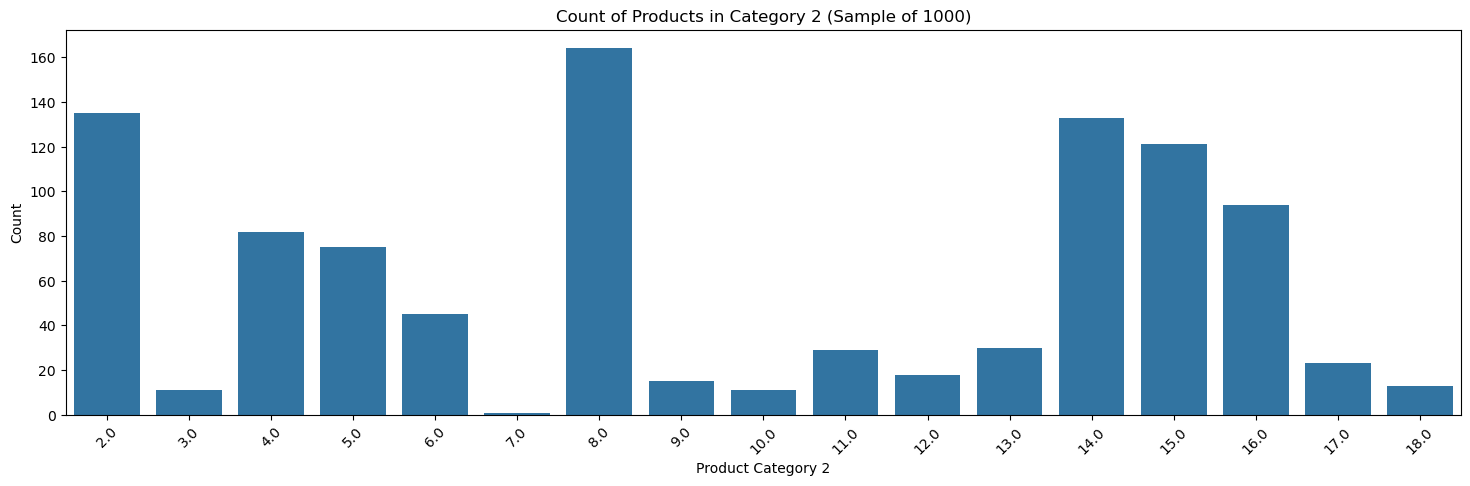

In [30]:
plt.figure(figsize=(18,5)); sns.countplot(x=data['Product_Category_2'].dropna().sample(1000, random_state=42)); plt.xticks(rotation=45); plt.title("Count of Products in Category 2 (Sample of 1000)"); plt.xlabel("Product Category 2"); plt.ylabel("Count"); plt.show()


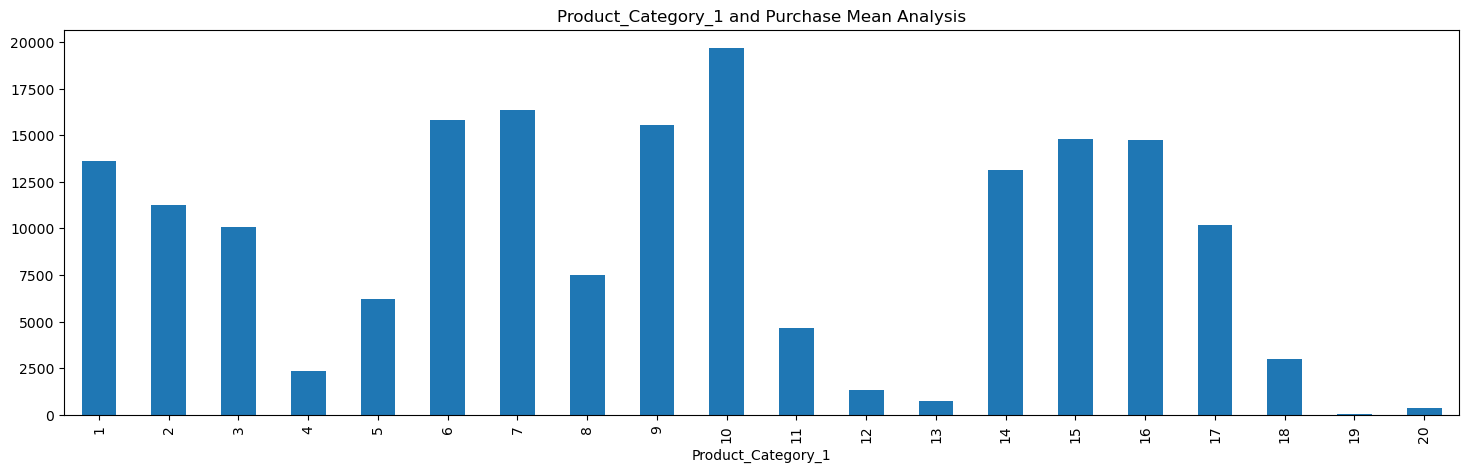

In [31]:
data.groupby('Product_Category_1')['Purchase'].mean().plot(kind='bar',figsize=(18,5))
plt.title("Product_Category_1 and Purchase Mean Analysis")
plt.show()

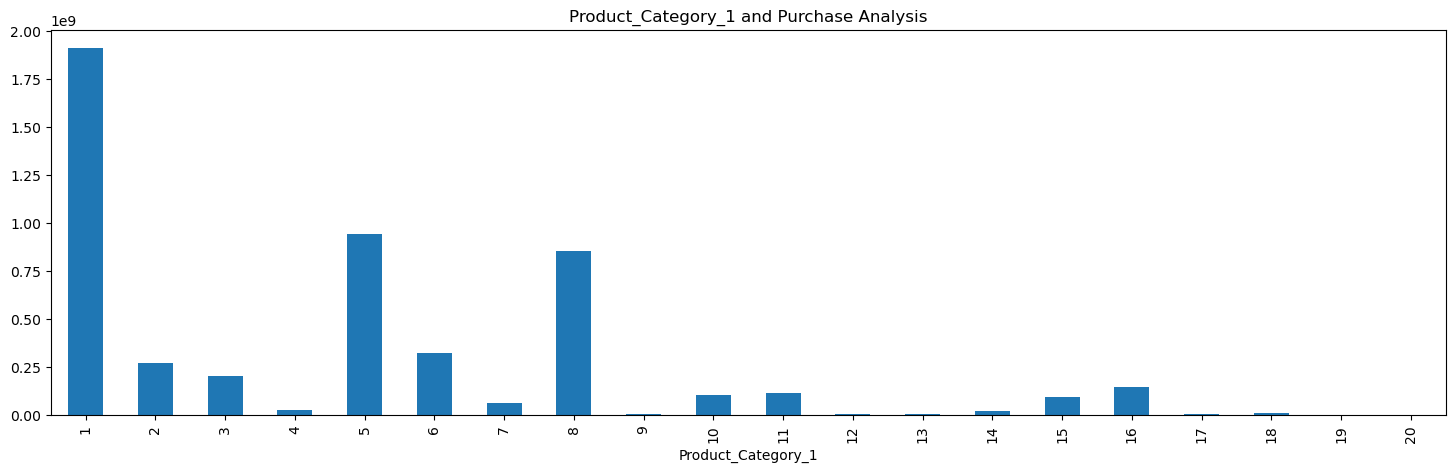

In [32]:
data.groupby('Product_Category_1')['Purchase'].sum().plot(kind='bar',figsize=(18,5))
plt.title("Product_Category_1 and Purchase Analysis")
plt.show()

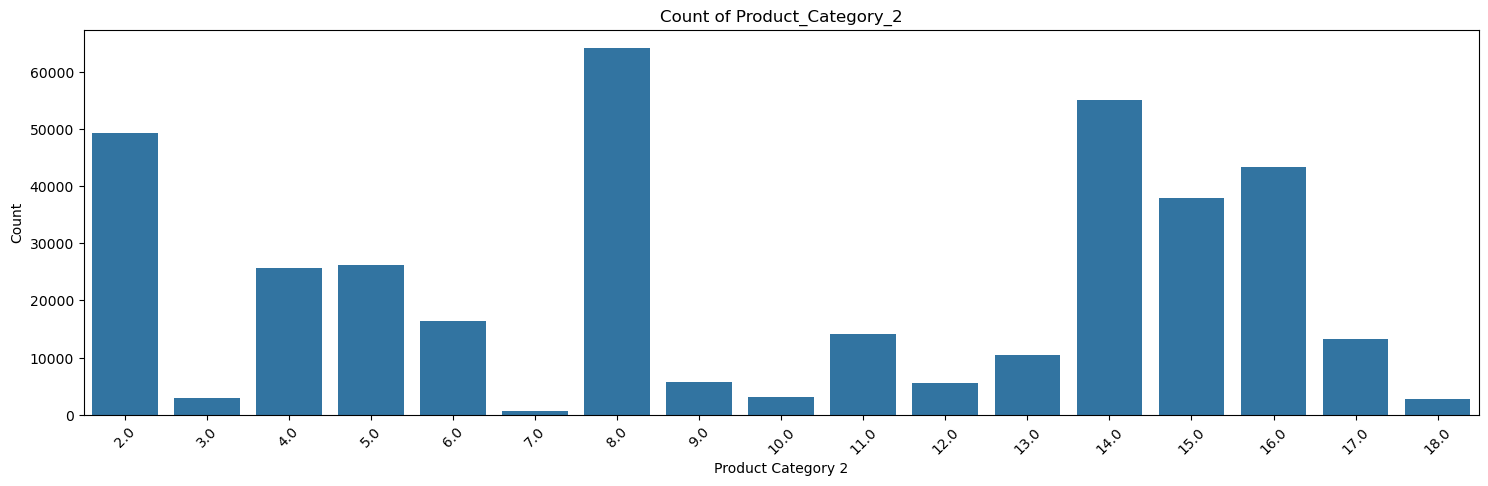

In [33]:
plt.figure(figsize=(18,5)); sns.countplot(x=data['Product_Category_2']); plt.xticks(rotation=45); plt.title("Count of Product_Category_2"); plt.xlabel("Product Category 2"); plt.ylabel("Count"); plt.show()


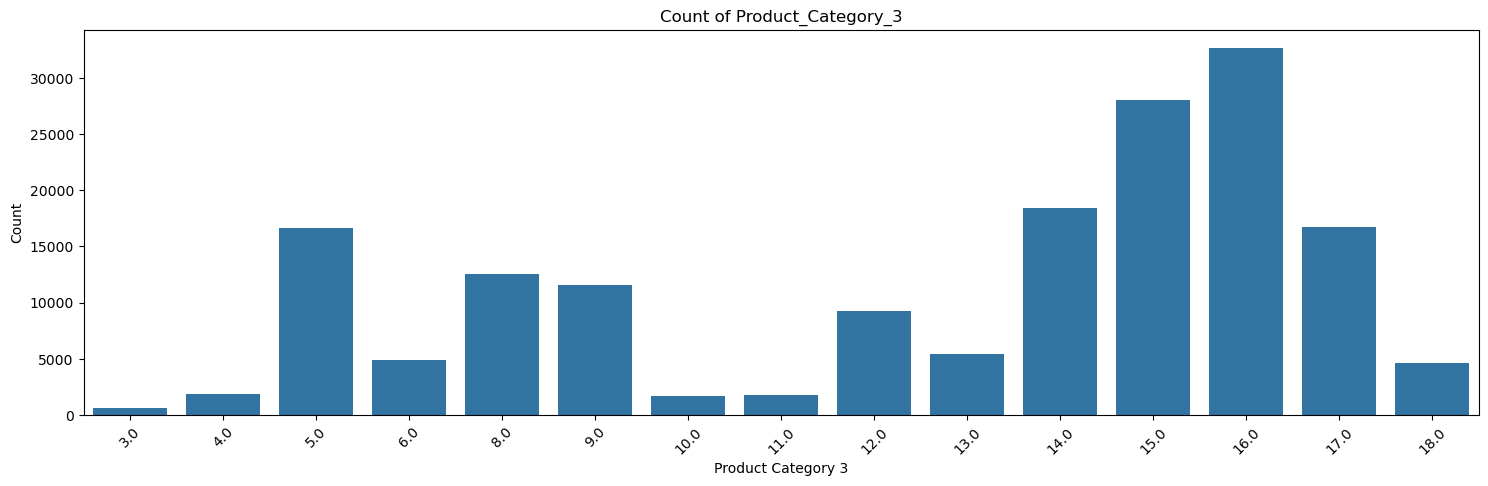

In [34]:
plt.figure(figsize=(18,5)); sns.countplot(x=data['Product_Category_3'].dropna()); plt.xticks(rotation=45); plt.title("Count of Product_Category_3"); plt.xlabel("Product Category 3"); plt.ylabel("Count"); plt.show()


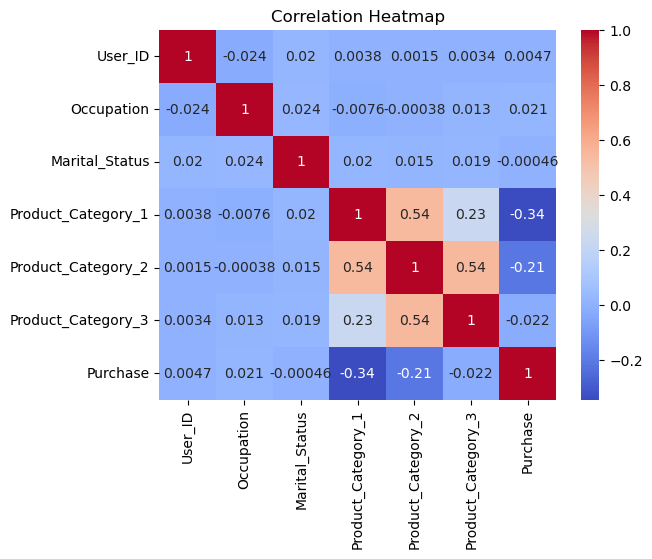

In [35]:
sns.heatmap(data.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm'); plt.title("Correlation Heatmap"); plt.show()


In [36]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [37]:
df = data.copy()

In [38]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [39]:
# df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace(to_replace="4+",value="4")

In [40]:
#Dummy Variables:
df = pd.get_dummies(df, columns=['Stay_In_Current_City_Years'])

In [41]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()

In [42]:
df['Gender'] = lr.fit_transform(df['Gender'])

In [43]:
df['Age'] = lr.fit_transform(df['Age'])

In [44]:
df['City_Category'] = lr.fit_transform(df['City_Category'])

In [45]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,1000001,P00069042,0,0,10,0,0,3,NaN,NaN,8370,False,False,True,False,False
1,1000001,P00248942,0,0,10,0,0,1,6.0,14.0,15200,False,False,True,False,False
2,1000001,P00087842,0,0,10,0,0,12,NaN,NaN,1422,False,False,True,False,False
3,1000001,P00085442,0,0,10,0,0,12,14.0,NaN,1057,False,False,True,False,False
4,1000002,P00285442,1,6,16,2,0,8,NaN,NaN,7969,False,False,False,False,True


In [46]:
df['Product_Category_2'] =df['Product_Category_2'].fillna(0).astype('int64')
df['Product_Category_3'] =df['Product_Category_3'].fillna(0).astype('int64')

In [47]:
df.isnull().sum()

User_ID                          0
Product_ID                       0
Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Marital_Status                   0
Product_Category_1               0
Product_Category_2               0
Product_Category_3               0
Purchase                         0
Stay_In_Current_City_Years_0     0
Stay_In_Current_City_Years_1     0
Stay_In_Current_City_Years_2     0
Stay_In_Current_City_Years_3     0
Stay_In_Current_City_Years_4+    0
dtype: int64

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   User_ID                        550068 non-null  int64 
 1   Product_ID                     550068 non-null  object
 2   Gender                         550068 non-null  int32 
 3   Age                            550068 non-null  int32 
 4   Occupation                     550068 non-null  int64 
 5   City_Category                  550068 non-null  int32 
 6   Marital_Status                 550068 non-null  int64 
 7   Product_Category_1             550068 non-null  int64 
 8   Product_Category_2             550068 non-null  int64 
 9   Product_Category_3             550068 non-null  int64 
 10  Purchase                       550068 non-null  int64 
 11  Stay_In_Current_City_Years_0   550068 non-null  bool  
 12  Stay_In_Current_City_Years_1   550068 non-nu

In [49]:
df = df.drop(["User_ID","Product_ID"],axis=1)

In [50]:
X = df.drop("Purchase",axis=1)

In [51]:
y=df['Purchase']

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [55]:
lr.intercept_

-1301063315501897.5

In [56]:
lr.coef_

array([ 4.66441043e+02,  1.12198927e+02,  4.98595180e+00,  3.13526861e+02,
       -5.77305242e+01, -3.48488929e+02,  1.29788618e+01,  1.43491437e+02,
        1.30106332e+15,  1.30106332e+15,  1.30106332e+15,  1.30106332e+15,
        1.30106332e+15])

In [57]:
y_pred = lr.predict(X_test)

In [58]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [59]:
mean_absolute_error(y_test, y_pred)

3532.0123317638363

In [60]:
mean_squared_error(y_test, y_pred)

21397423.894089993

In [61]:
r2_score(y_test, y_pred)

0.15194646283612467

In [62]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, y_pred)))

RMSE of Linear Regression Model is  4625.734957181398


In [63]:
from sklearn.tree import DecisionTreeRegressor

# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)  

In [64]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [65]:
dt_y_pred = regressor.predict(X_test)

In [66]:
mean_absolute_error(y_test, dt_y_pred)

2372.0357559134654

In [67]:
mean_squared_error(y_test, dt_y_pred)

11300579.466797074

In [68]:
r2_score(y_test, dt_y_pred)

0.5521191505924365

In [69]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, dt_y_pred)))

RMSE of Linear Regression Model is  3361.633452177241


In [70]:
from sklearn.ensemble import RandomForestRegressor

# create a regressor object 
RFregressor = RandomForestRegressor(random_state = 0)  

In [71]:
from sklearn.ensemble import RandomForestRegressor

RFregressor = RandomForestRegressor(
    n_estimators=50,     # fewer trees for faster training
    max_depth=10,        # limit tree depth
    n_jobs=-1,           # use all CPU cores
    random_state=42
)
RFregressor.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, n_estimators=50, n_jobs=-1, random_state=42)

In [72]:
rf_y_pred = RFregressor.predict(X_test)

In [73]:
mean_absolute_error(y_test, rf_y_pred)

2208.9841485498014

In [74]:
mean_squared_error(y_test, rf_y_pred)

8625948.898949806

In [75]:
r2_score(y_test, rf_y_pred)

0.6581239633631921

In [76]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, rf_y_pred)))

RMSE of Linear Regression Model is  2936.99657796018


In [77]:
from xgboost.sklearn import XGBRegressor

In [78]:
xgb_reg = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)

xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=1.0, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=40, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [79]:
xgb_y_pred = xgb_reg.predict(X_test)

In [80]:
mean_absolute_error(y_test, xgb_y_pred)

2141.713511241279

In [81]:
mean_squared_error(y_test, xgb_y_pred)

8241184.08588845

In [82]:
r2_score(y_test, xgb_y_pred)

0.6733734607696533

In [83]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, xgb_y_pred)))

RMSE of Linear Regression Model is  2870.7462594051135
